## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

Submit your work below, and plan on discussing with your mentor. You can also take a look at these [example solutions](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_data_exploration_1/solution.ipynb).

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#use previous assignment's code to import and clean data
%run us_ed_dataset.py

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [3]:
who

create_engine	 engine	 np	 pd	 plot_nulls	 plt	 postgres_db	 postgres_host	 postgres_port	 
postgres_pw	 postgres_user	 remove_nonstate	 sns	 statecolmean	 usedu_df	 usedu_stateonly_df	 


In [4]:
usedu_stateonly_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1229.000000,1.229000e+03,1.229000e+03,1.229000e+03,1.229000e+03,1.229000e+03,1.229000e+03,1.229000e+03,1.229000e+03,1.229000e+03,...,1229.000000,1229.000000,1229.000000,1.229000e+03,1.229000e+03,1.229000e+03,1229.000000,1229.000000,1229.000000,1229.000000
mean,2004.516680,9.159308e+05,9.279621e+06,7.858487e+05,4.304869e+06,4.188903e+06,9.385206e+06,4.858782e+06,2.734699e+06,4.292046e+05,...,70790.065907,70641.537022,60275.293735,5.694245e+05,2.729849e+05,8.620433e+05,235.033493,278.904501,219.169995,263.428948
std,6.916022,1.065280e+06,1.190203e+07,1.162471e+06,5.613354e+06,5.557662e+06,1.213844e+07,6.377323e+06,3.395822e+06,5.340693e+05,...,82830.903073,81464.192710,70783.869816,6.633925e+05,3.187398e+05,1.005918e+06,9.179530,9.560445,7.396096,5.437708
min,1993.000000,4.386600e+04,4.656500e+05,3.367200e+04,0.000000e+00,2.391700e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,2548.000000,1485.000000,484.000000,1.922600e+04,2.758000e+03,2.455400e+04,187.134670,232.831510,181.626990,236.379102
25%,1999.000000,2.583140e+05,2.212104e+06,1.921820e+05,1.185162e+06,7.382910e+05,2.198940e+06,1.189394e+06,6.503950e+05,1.028310e+05,...,19814.000000,20299.000000,17078.000000,1.620700e+05,7.669600e+04,2.419950e+05,230.109324,273.474231,215.119433,260.321697
50%,2005.000000,6.483130e+05,5.251014e+06,4.208200e+05,2.612740e+06,2.098372e+06,5.397194e+06,2.736786e+06,1.565012e+06,2.715960e+05,...,49603.000000,49580.000000,40034.000000,4.014360e+05,1.835990e+05,6.086530e+05,236.625900,280.821426,220.822688,264.267365
75%,2010.000000,1.014528e+06,1.113997e+07,8.482540e+05,5.224450e+06,4.803538e+06,1.091791e+07,5.659432e+06,3.313154e+06,5.186000e+05,...,79257.000000,80683.000000,71035.000000,6.399310e+05,3.160620e+05,9.684370e+05,241.480599,285.078103,223.975501,267.030851
max,2016.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,277.191363


reading scientific notation makes it very hard to read a dataframe...


2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

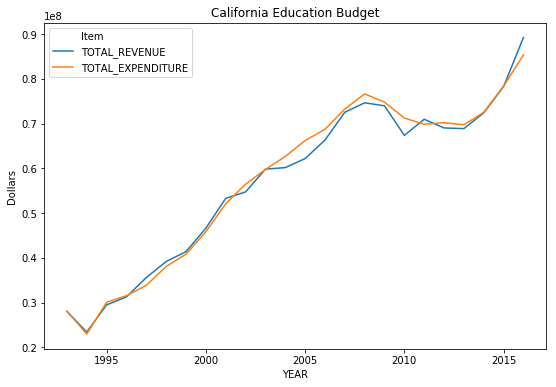

In [5]:
#change data into sns-friendly format
cali_df = usedu_stateonly_df[usedu_stateonly_df['STATE'] == 'CALIFORNIA'].melt(id_vars=['STATE', 'YEAR'], value_vars=['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'],
                                                                              var_name='Item', value_name='Dollars')
fig, ax1 = plt.subplots(figsize=(9, 6))
ax1 = sns.lineplot(data=cali_df, x='YEAR', y='Dollars', hue='Item')
plt.title("California Education Budget");

3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [6]:
cali_math4 = usedu_stateonly_df[usedu_stateonly_df["STATE"] == "CALIFORNIA"]["AVG_MATH_4_SCORE"].mean()/ \
usedu_stateonly_df["AVG_MATH_4_SCORE"].mean()

cali_math8 = usedu_stateonly_df[usedu_stateonly_df["STATE"] == "CALIFORNIA"]["AVG_MATH_8_SCORE"].mean()/ \
usedu_stateonly_df["AVG_MATH_8_SCORE"].mean()

cali_read4 = usedu_stateonly_df[usedu_stateonly_df["STATE"] == "CALIFORNIA"]["AVG_READING_4_SCORE"].mean()/ \
usedu_stateonly_df["AVG_READING_4_SCORE"].mean()

cali_read8 = usedu_stateonly_df[usedu_stateonly_df["STATE"] == "CALIFORNIA"]["AVG_READING_8_SCORE"].mean()/ \
usedu_stateonly_df["AVG_READING_8_SCORE"].mean() 

print(f"California's reading scores are {cali_read4} and {cali_read8} at 4th and 8th Grade, and the respective maths \
scores are {cali_math4} and {cali_math8}.")

California's reading scores are 0.9491801420673607 and 0.994444063156273 at 4th and 8th Grade, and the respective maths scores are 0.9598636681125025 and 0.9640753917633111.


The scores are not clearly superior in reading or math.

4. What are the distributions of the math and reading scores in the sample?

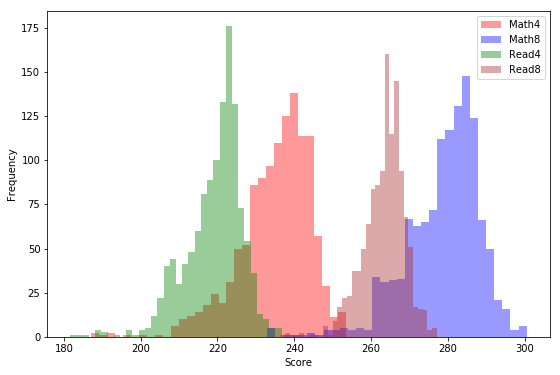

In [7]:
fig2, ax2 = plt.subplots(figsize=(9, 6))
ax2 = sns.distplot(usedu_stateonly_df.AVG_MATH_4_SCORE, kde=False, color='red', label='Math4', axlabel=False)
ax2 = sns.distplot(usedu_stateonly_df.AVG_MATH_8_SCORE, kde=False, color='blue', label='Math8', axlabel=False)
ax2 = sns.distplot(usedu_stateonly_df.AVG_READING_4_SCORE, kde=False, color='green', label='Read4', axlabel=False)
ax2 = sns.distplot(usedu_stateonly_df.AVG_READING_8_SCORE, kde=False, color='brown', label='Read8', axlabel=False)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

did this last assignment...